In [4]:
# Conecte colab with drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import datetime
print(f"last run: {datetime.datetime.now()}")

last run: 2025-06-28 07:30:46.141560


In [10]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [11]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [12]:
print(f" Training data : {train_data[0]} \n")

 Training data : [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [13]:
print(f"Testing data :{test_labels[0]}")

Testing data :9


In [14]:
import numpy as np

rang_labels = np.unique(train_labels)
print(f"Labels : {rang_labels}")

Labels : [0 1 2 3 4 5 6 7 8 9]


In [ ]:
train_data.shape, train_labels.shape, test_data.shape, test

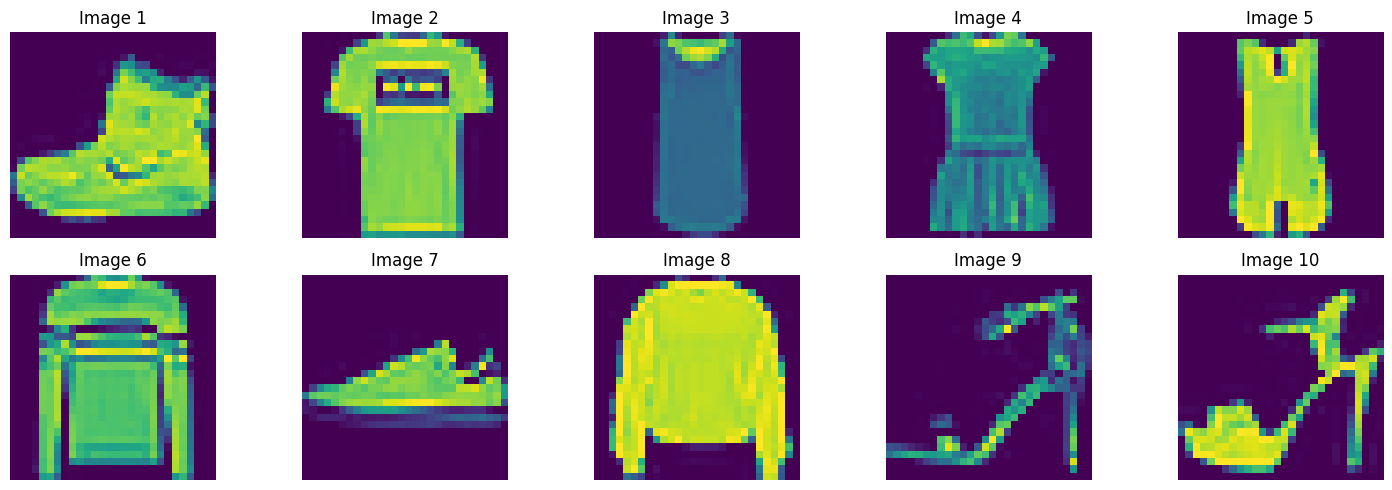

In [18]:
import matplotlib.pyplot as plt

n_img = 10
plt.figure(figsize=(15, 5))  # adjust size as needed

for i in range(n_img):
    plt.subplot(2, 5, i + 1)  # 2 rows, 5 columns
    plt.imshow(train_data[i])
    plt.axis('off')
    plt.title(f"Image {i+1}")

plt.tight_layout()
plt.show()
